In [2]:

import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

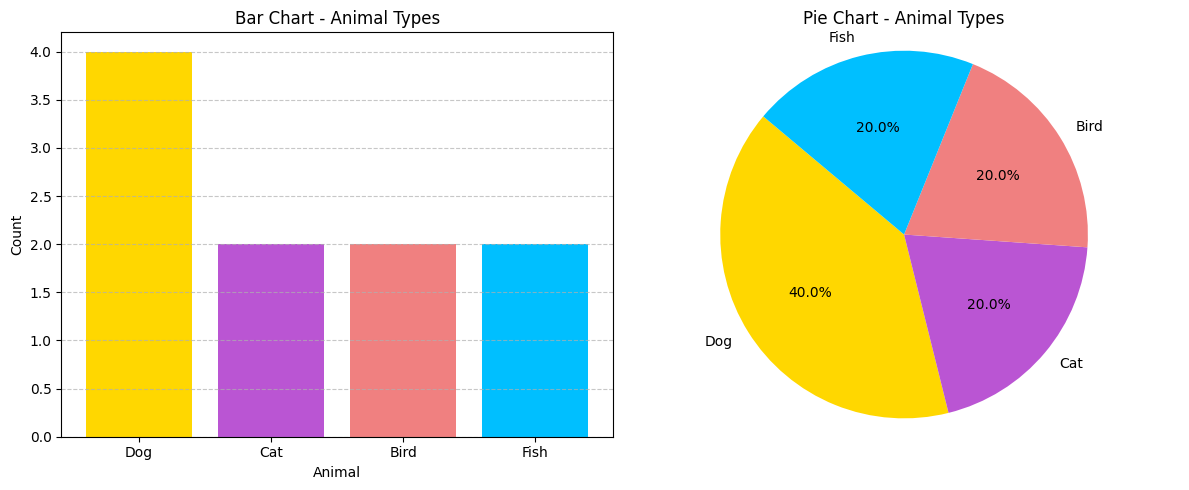

In [3]:



# Sample nominal data: animal types
animals = ["Dog", "Cat", "Dog", "Bird", "Cat", "Dog", "Fish", "Bird", "Fish", "Dog"]

# Count each animal type
animal_counts = Counter(animals)

# Prepare labels and values
labels = list(animal_counts.keys())
values = list(animal_counts.values())

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# New color palette
colors = ['gold', 'mediumorchid', 'lightcoral', 'deepskyblue']

# Bar chart
ax1.bar(labels, values, color=colors[:len(labels)])
ax1.set_title("Bar Chart - Animal Types")
ax1.set_xlabel("Animal")
ax1.set_ylabel("Count")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Pie chart
ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors[:len(labels)])
ax2.set_title("Pie Chart - Animal Types")
ax2.axis('equal')  # Make pie chart a circle

plt.tight_layout()
plt.show()

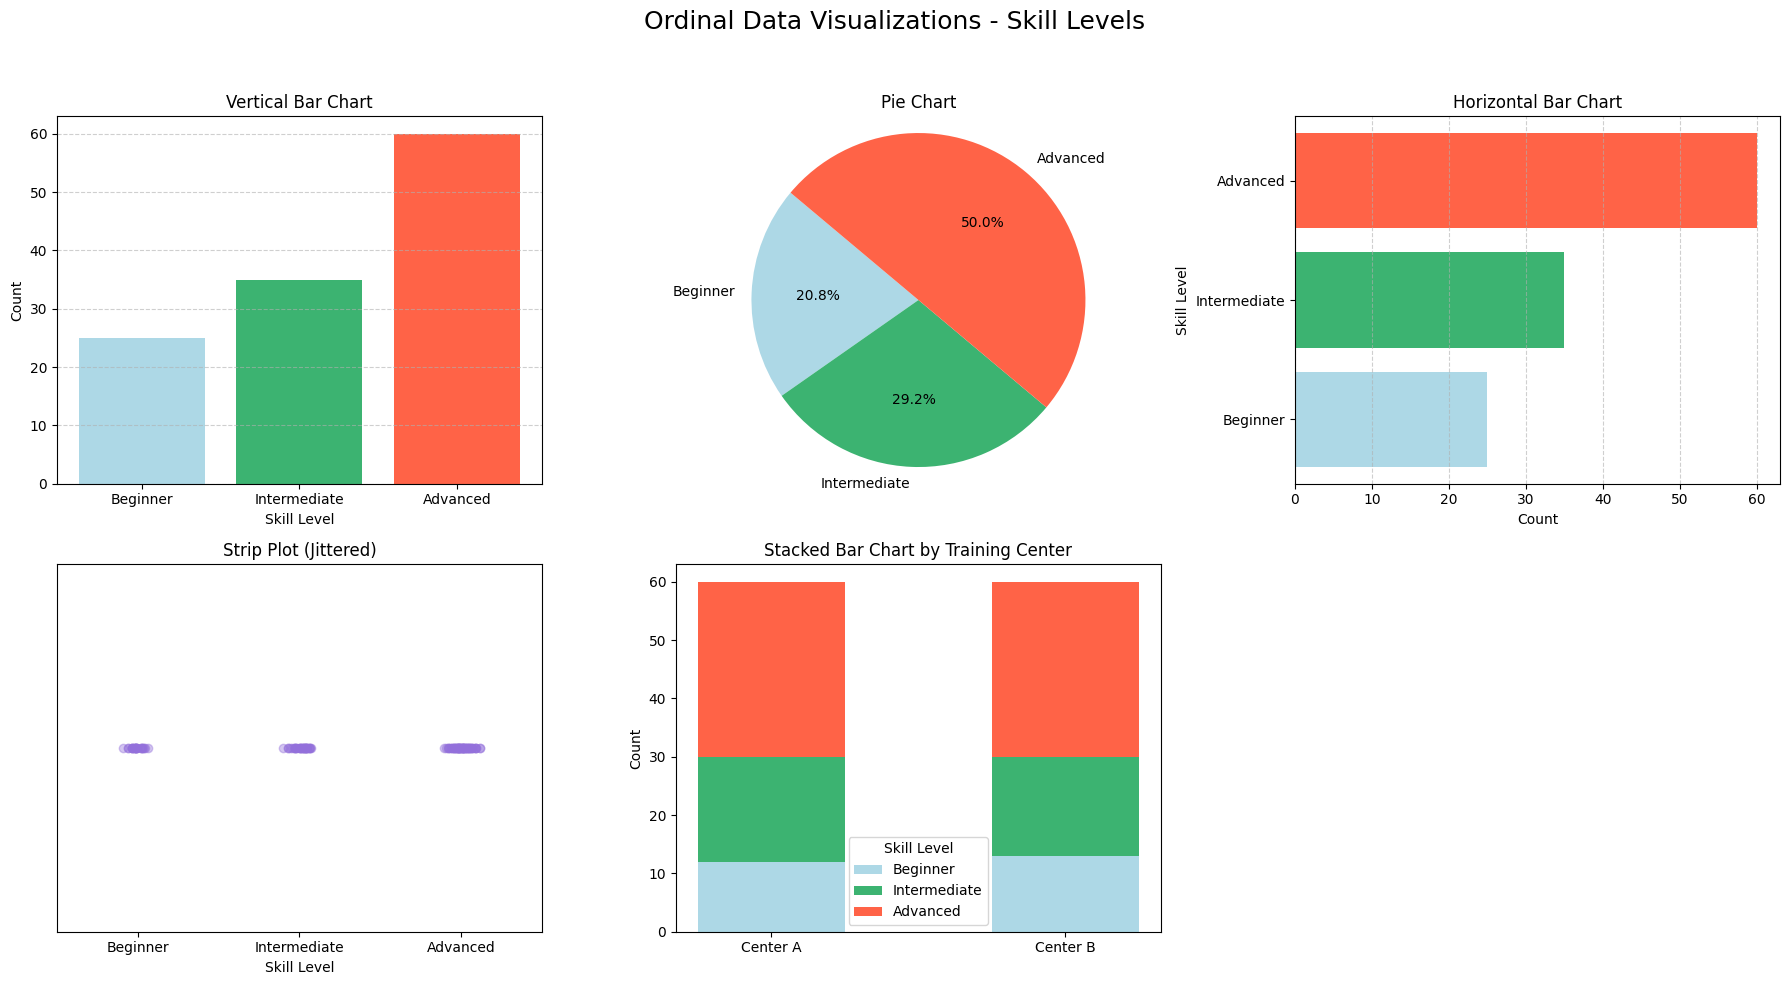

In [4]:

responses = ["Beginner"] * 25 + ["Intermediate"] * 35 + ["Advanced"] * 60
ordered_levels = ["Beginner", "Intermediate", "Advanced"]
responses_series = pd.Categorical(responses, categories=ordered_levels, ordered=True)

# Count each level
response_counts = Counter(responses_series)

labels = ordered_levels
values = [response_counts[level] for level in labels]

# Strip plot data
strip_data = []
for level in ordered_levels:
    strip_data.extend([level] * response_counts[level])
strip_df = pd.DataFrame({"SkillLevel": strip_data})

# Stacked bar chart data: skill levels across 2 training centers
dept_data = {
    "Center A": ["Beginner"] * 12 + ["Intermediate"] * 18 + ["Advanced"] * 30,
    "Center B": ["Beginner"] * 13 + ["Intermediate"] * 17 + ["Advanced"] * 30,
}
stacked_df = pd.DataFrame(dict([(k, pd.Categorical(v, categories=ordered_levels, ordered=True)) for k, v in dept_data.items()]))
stacked_counts = pd.DataFrame({dept: stacked_df[dept].value_counts().sort_index() for dept in stacked_df})

# Colors
colors = ['lightblue', 'mediumseagreen', 'tomato']

# --- Plotting ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Ordinal Data Visualizations - Skill Levels", fontsize=18)

# 1. Vertical Bar Chart
axes[0, 0].bar(labels, values, color=colors)
axes[0, 0].set_title("Vertical Bar Chart")
axes[0, 0].set_xlabel("Skill Level")
axes[0, 0].set_ylabel("Count")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Pie Chart
axes[0, 1].pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0, 1].set_title("Pie Chart")
axes[0, 1].axis('equal')

# 3. Horizontal Bar Chart
axes[0, 2].barh(labels, values, color=colors)
axes[0, 2].set_title("Horizontal Bar Chart")
axes[0, 2].set_xlabel("Count")
axes[0, 2].set_ylabel("Skill Level")
axes[0, 2].grid(axis='x', linestyle='--', alpha=0.6)

# 4. Strip Plot (Jittered)
jitter = np.random.normal(0, 0.05, size=len(strip_df))
ordinal_mapping = {k: v for v, k in enumerate(ordered_levels)}
strip_df["x"] = [ordinal_mapping[val] + jitter[i] for i, val in enumerate(strip_df["SkillLevel"])]
strip_df["y"] = [1] * len(strip_df)

axes[1, 0].plot(strip_df["x"], strip_df["y"], 'o', alpha=0.4, markersize=6, color='mediumpurple')
axes[1, 0].set_title("Strip Plot (Jittered)")
axes[1, 0].set_yticks([])
axes[1, 0].set_xticks(list(ordinal_mapping.values()))
axes[1, 0].set_xticklabels(ordered_levels)
axes[1, 0].set_xlabel("Skill Level")
axes[1, 0].set_xlim(-0.5, 2.5)

# 5. Stacked Bar Chart
bar_width = 0.5
x = np.arange(len(stacked_counts.columns))
bottom = np.zeros(len(x))

for idx, level in enumerate(ordered_levels):
    counts = stacked_counts.loc[level]
    axes[1, 1].bar(x, counts, bar_width, label=level, bottom=bottom, color=colors[idx])
    bottom += counts

axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(stacked_counts.columns)
axes[1, 1].set_title("Stacked Bar Chart by Training Center")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title="Skill Level")

# Hide the 6th subplot (unused)
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

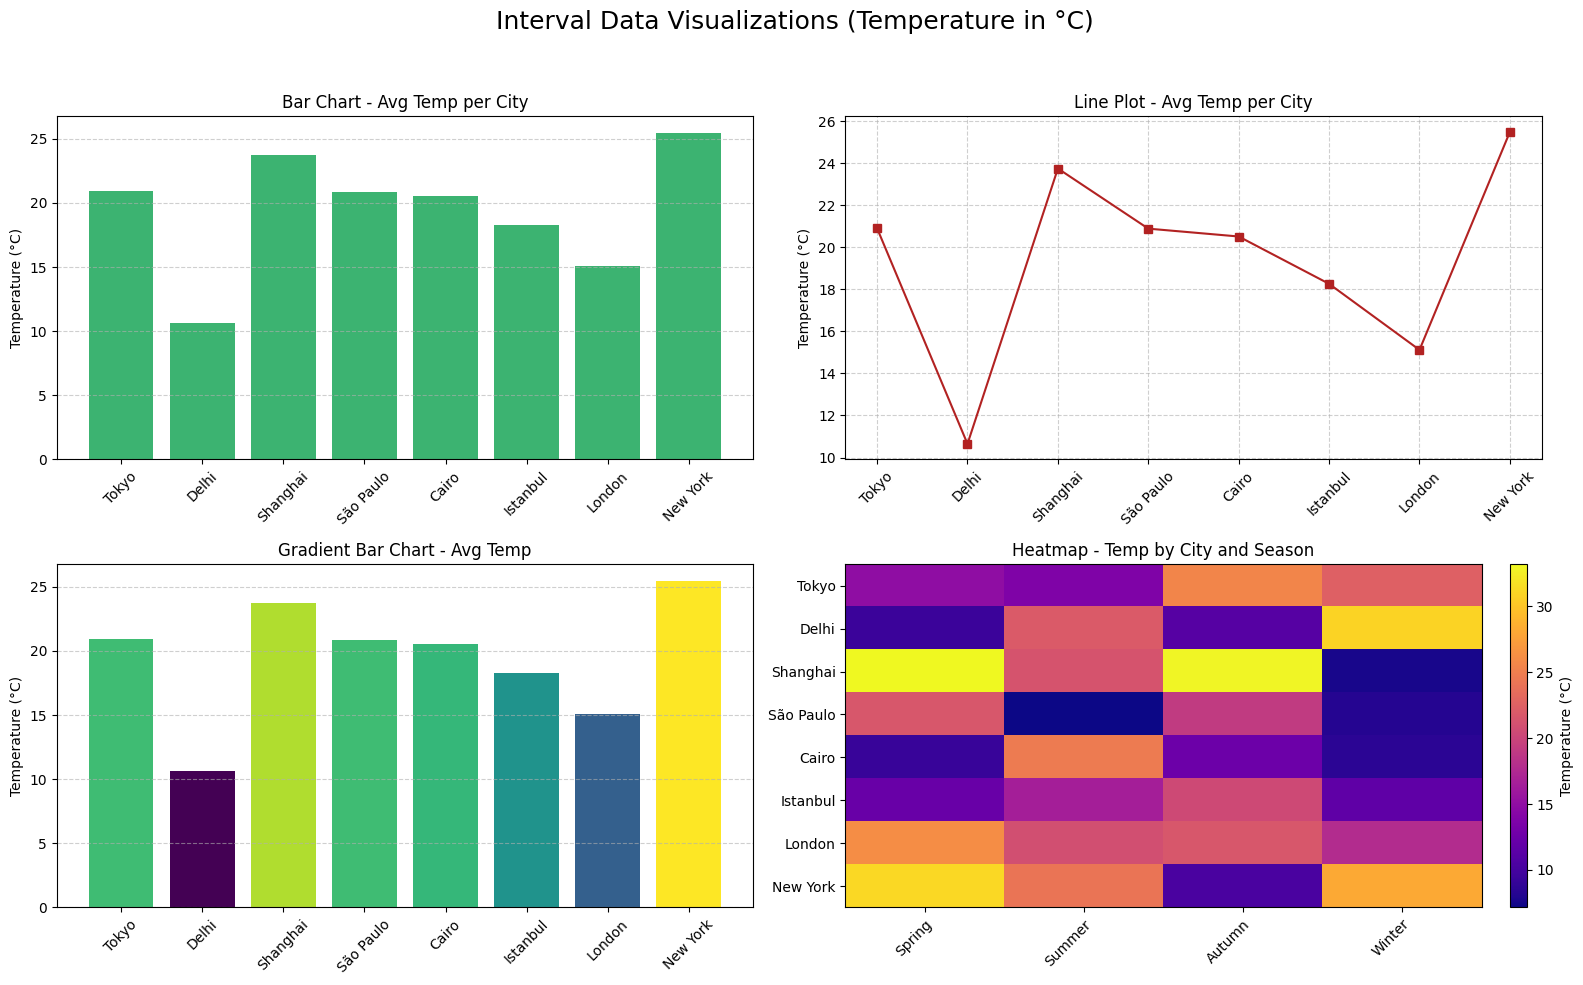

In [5]:
# Updated Cities and Seasons
cities = ["Tokyo", "Delhi", "Shanghai", "São Paulo", "Cairo", "Istanbul", "London", "New York"]
seasons = ["Spring", "Summer", "Autumn", "Winter"]

# Randomized interval data (Temperatures)
np.random.seed(2)
city_temperatures = np.random.uniform(10, 35, size=len(cities))  # 1D values
temperature_matrix = np.random.uniform(5, 38, size=(len(cities), len(seasons)))  # Heatmap matrix

# Normalize values for gradient coloring
norm_values = (city_temperatures - min(city_temperatures)) / (max(city_temperatures) - min(city_temperatures))
gradient_colors = plt.cm.viridis(norm_values)

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Interval Data Visualizations (Temperature in °C)", fontsize=18)

# 1. Vertical Bar Chart
axes[0, 0].bar(cities, city_temperatures, color='mediumseagreen')
axes[0, 0].set_title("Bar Chart - Avg Temp per City")
axes[0, 0].set_ylabel("Temperature (°C)")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

# 2. Line Plot
axes[0, 1].plot(cities, city_temperatures, marker='s', linestyle='-', color='firebrick')
axes[0, 1].set_title("Line Plot - Avg Temp per City")
axes[0, 1].set_ylabel("Temperature (°C)")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# 3. Gradient-colored Bar Chart
axes[1, 0].bar(cities, city_temperatures, color=gradient_colors)
axes[1, 0].set_title("Gradient Bar Chart - Avg Temp")
axes[1, 0].set_ylabel("Temperature (°C)")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

# 4. Heatmap (City × Season)
heatmap = axes[1, 1].imshow(temperature_matrix, cmap='plasma', aspect='auto')
axes[1, 1].set_xticks(np.arange(len(seasons)))
axes[1, 1].set_yticks(np.arange(len(cities)))
axes[1, 1].set_xticklabels(seasons)
axes[1, 1].set_yticklabels(cities)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
axes[1, 1].set_title("Heatmap - Temp by City and Season")

# Colorbar
cbar = fig.colorbar(heatmap, ax=axes[1, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Temperature (°C)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

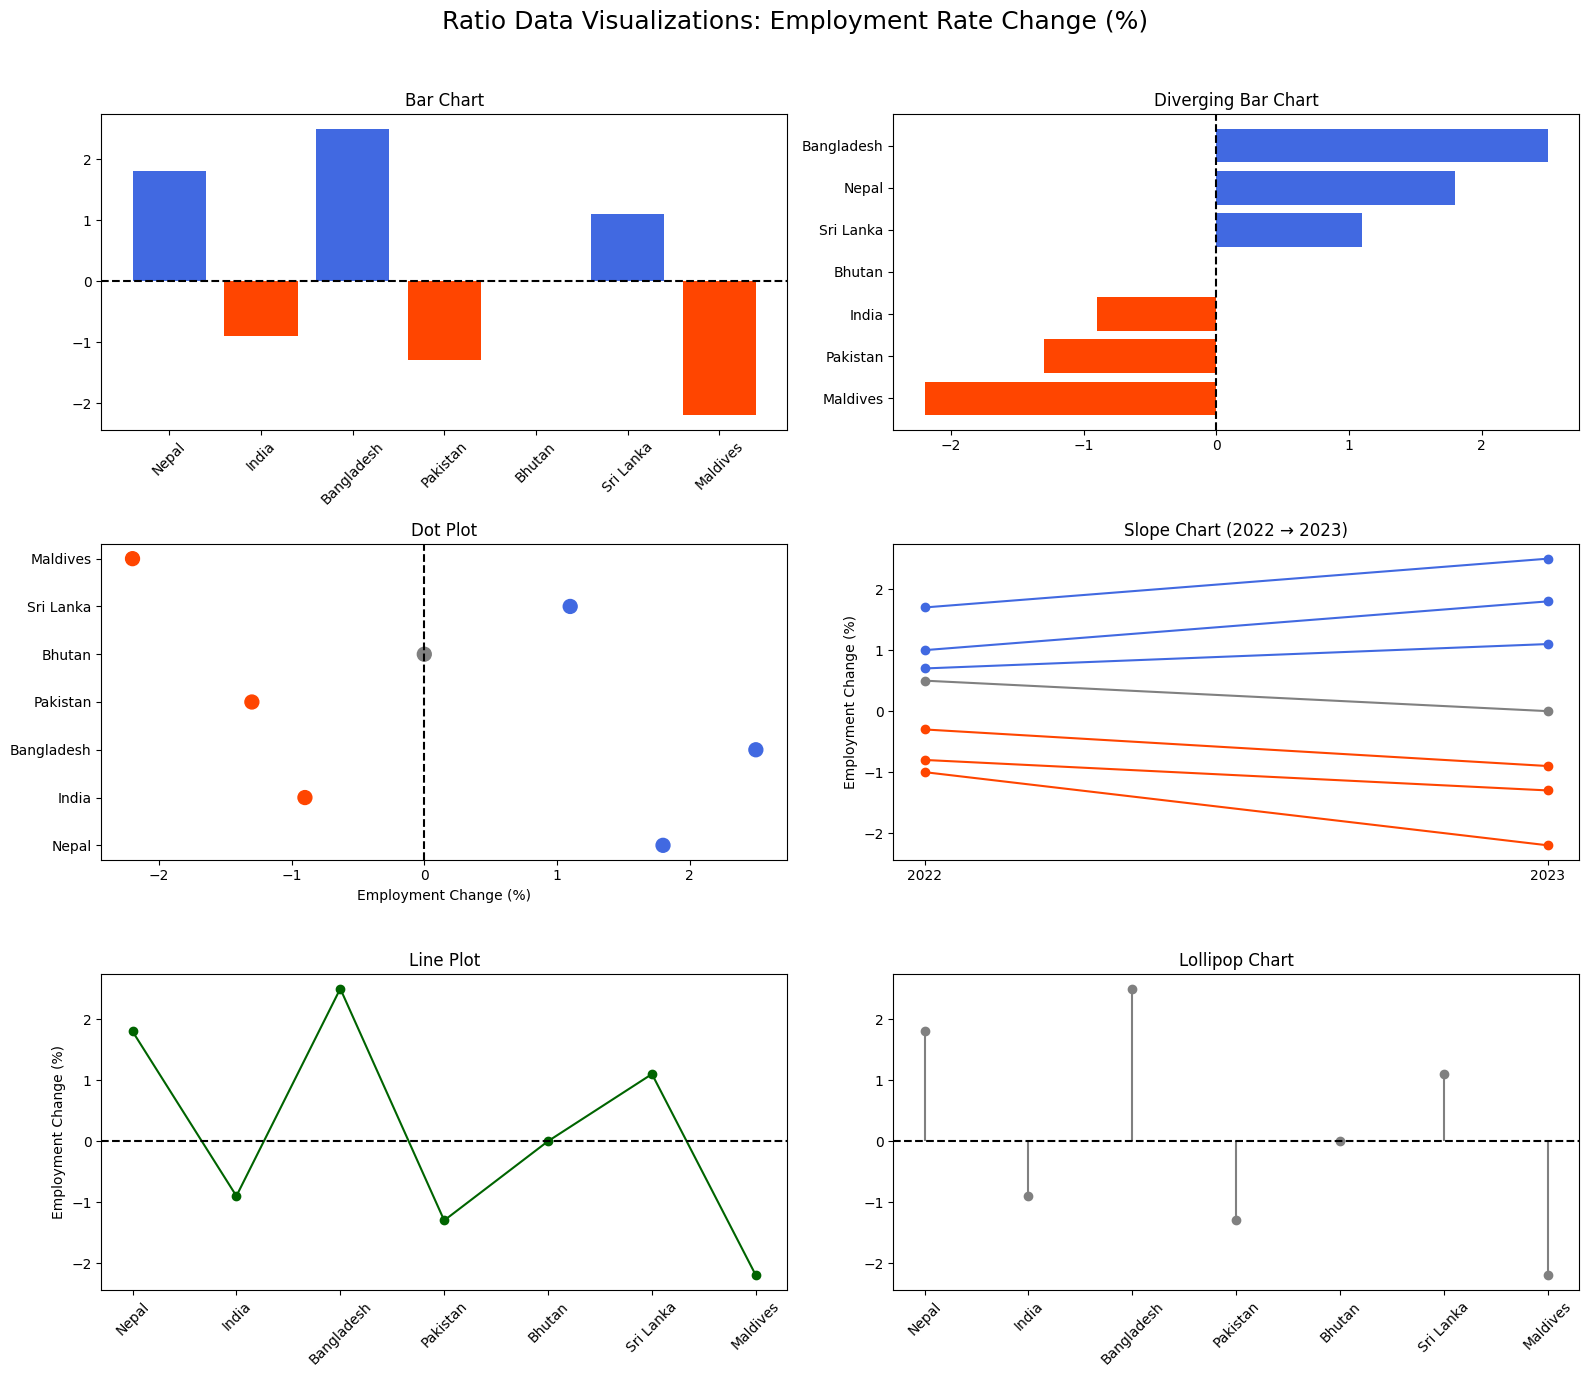

In [6]:
# New ratio data: Employment Rate Change (%)
countries = ["Nepal", "India", "Bangladesh", "Pakistan", "Bhutan", "Sri Lanka", "Maldives"]
employment_change_2023 = [1.8, -0.9, 2.5, -1.3, 0.0, 1.1, -2.2]

# Color mapping
colors = ['royalblue' if val > 0 else 'orangered' if val < 0 else 'gray' for val in employment_change_2023]
x_pos = np.arange(len(countries))

# Slope Chart Data: 2022 vs 2023
employment_2022 = [1.0, -0.3, 1.7, -0.8, 0.5, 0.7, -1.0]
employment_2023 = employment_change_2023

# --- Plot setup ---
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Ratio Data Visualizations: Employment Rate Change (%)", fontsize=18)

# 1. Bar Chart
axes[0, 0].bar(countries, employment_change_2023, color=colors)
axes[0, 0].set_title("Bar Chart")
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Diverging Bar Chart
sorted_data = sorted(zip(countries, employment_change_2023), key=lambda x: x[1])
sorted_countries = [x[0] for x in sorted_data]
sorted_growth = [x[1] for x in sorted_data]
sorted_colors = ['royalblue' if val > 0 else 'orangered' if val < 0 else 'gray' for val in sorted_growth]

axes[0, 1].barh(sorted_countries, sorted_growth, color=sorted_colors)
axes[0, 1].axvline(0, color='black', linestyle='--')
axes[0, 1].set_title("Diverging Bar Chart")

# 3. Dot Plot
axes[1, 0].scatter(employment_change_2023, countries, color=colors, s=100)
axes[1, 0].axvline(0, color='black', linestyle='--')
axes[1, 0].set_title("Dot Plot")
axes[1, 0].set_xlabel("Employment Change (%)")

# 4. Slope Chart
for i in range(len(countries)):
    axes[1, 1].plot([2022, 2023], [employment_2022[i], employment_2023[i]], marker='o', label=countries[i], color=colors[i])
axes[1, 1].set_xticks([2022, 2023])
axes[1, 1].set_title("Slope Chart (2022 → 2023)")
axes[1, 1].set_ylabel("Employment Change (%)")

# 5. Line Chart
axes[2, 0].plot(countries, employment_change_2023, marker='o', linestyle='-', color='darkgreen')
axes[2, 0].axhline(0, color='black', linestyle='--')
axes[2, 0].set_title("Line Plot")
axes[2, 0].set_ylabel("Employment Change (%)")
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Lollipop Chart
axes[2, 1].stem(x_pos, employment_change_2023, linefmt='gray', markerfmt='o', basefmt=" ")
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels(countries, rotation=45)
axes[2, 1].axhline(0, color='black', linestyle='--')
axes[2, 1].set_title("Lollipop Chart")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()